<a href="https://colab.research.google.com/github/mepix/CropWeedClassification/blob/main/CropCNN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE244: Final Project Demo

In [2]:
# Import Libaries
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Subset
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from torch.optim import lr_scheduler
import time
import os
import copy
from torch.utils.data.sampler import WeightedRandomSampler
import seaborn as sn
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

## Load the Model

In [3]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Load the Best Saved Model
path_to_saved_model = '/content/gdrive/MyDrive/EE244/output/'
model_trained = torch.load(path_to_saved_model+"model-best.pth")
model_trained.eval() # Convert to evaluation only, this is faster

# Label Names
labels = ["Crop","Weed1","Weed2","Weed3","Weed4","Weed5","Weed6","Weed7","Weed8","Weed9"]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Load Sample Data

In [6]:
# Path to the Demo Data
path_to_data = '/content/gdrive/MyDrive/EE244/data/Demo'

# Set up the same image transforms
transform = transforms.Compose(
    [
    transforms.Resize([224,224]),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #MEAN & STDDEV for ResNet
    ])

# Check GPU or CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the Images from the Image Folder
dataset = datasets.ImageFolder(root=path_to_data, transform=transform)

# Build a Data Loader
dataloader = DataLoader(dataset,batch_size=1, num_workers=2,shuffle=True)

## Demo the Model

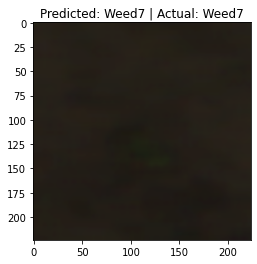

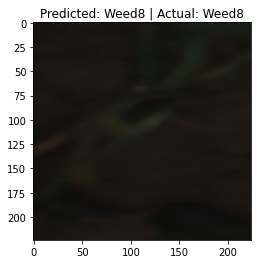

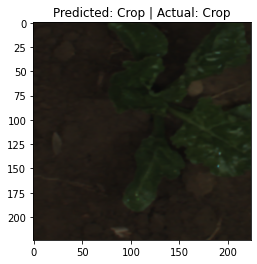

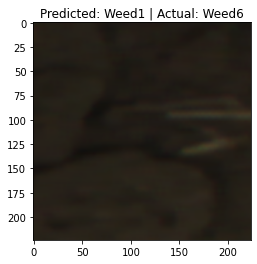

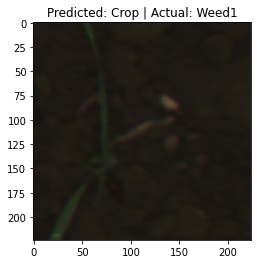

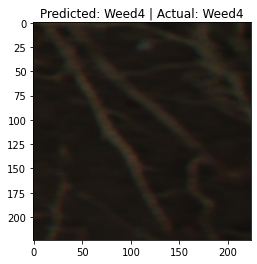

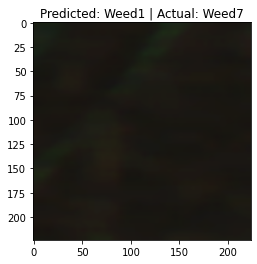

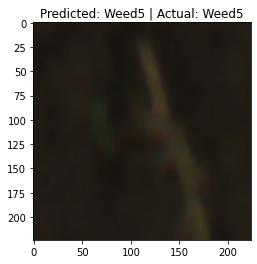

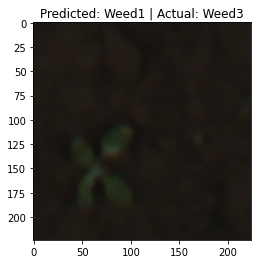

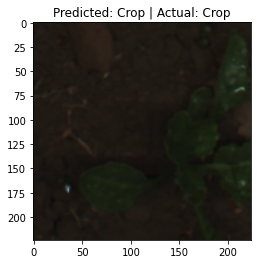

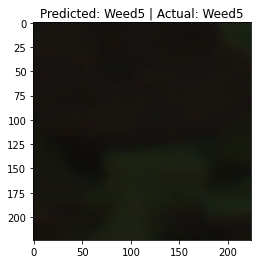

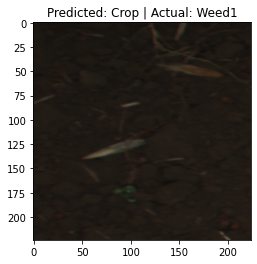

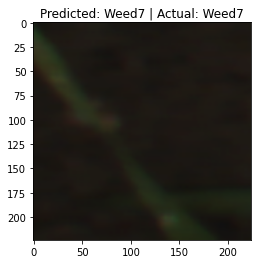

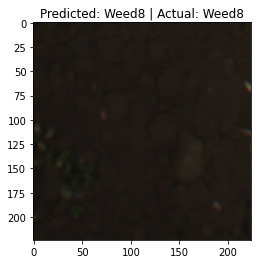

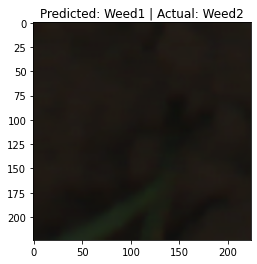

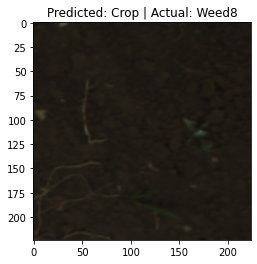

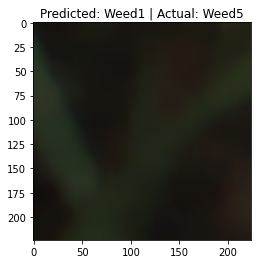

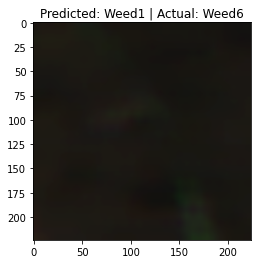

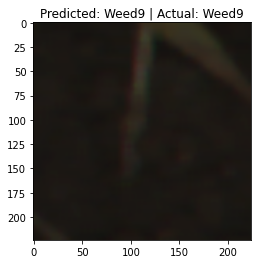

In [22]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean # Add back the mean and std for visualization
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def runDemo(model,dataloader,label_names,show_img=True,verbose=True):
  """Calculates the Confusion Matrix for the given dataloader"""
  
  # Fill out the confusion Matrix
  y_label = np.array([])
  y_predict = np.array([])
  with torch.no_grad():
      for i, (inputs, classes) in enumerate(dataloader):
          inputs = inputs.to(device)
          classes = classes.to(device)
          outputs = model(inputs)
          # Gets the predicted label
          _, preds = torch.max(outputs, 1)
          temp_labels = classes.view(1,-1).cpu().detach().numpy()
          temp_preds = preds.view(1,-1).cpu().detach().numpy()
          if verbose:
            print("Labels:",temp_labels)
            print("Predictions:",temp_preds)
          y_label = np.hstack([y_label,temp_labels]) if y_label.size else temp_labels
          y_predict = np.hstack([y_predict,temp_preds]) if y_predict.size else temp_preds
          
          if show_img:
            name_actual = label_names[int(temp_labels.flatten())]
            name_predict = label_names[int(temp_preds.flatten())]
            if verbose:
              print(name_actual)
              print(name_predict)
            title = "Predicted: " + name_predict + " | Actual: " + name_actual
            out = torchvision.utils.make_grid(inputs.cpu().detach())
            imshow(out,title)

runDemo(model_trained,dataloader,labels,True,False)